# Responsible Lending

##### Import statements

In [1]:
import numpy as np
import pandas as pd
import pandas_profiling as pdpr
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

C:\Users\pjmil\AppData\Local\Temp\ipykernel_19984\2960881967.py:3: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pdpr


### Sample of entries from the data

In [2]:
df = pd.read_excel("default of credit card clients.xls", header = 1) 
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


### Data cleaning

In [6]:
# maps the values for education and marriage that are outside of the official range, 
# to the largest values within those ranges
df["EDUCATION"] = df["EDUCATION"].map(lambda x: 4 if (x > 4 or x < 1) else x)
df["MARRIAGE"] = df["MARRIAGE"].map(lambda x: 3 if (x > 3 or x < 1) else x)

# eliminates other data whose values fall outside the official ranges
for x in df.index:
    if not (df.loc[x, "SEX"] in [1, 2]):
        df.drop(x, inplace = True)
    elif not (df.loc[x, "EDUCATION"] in [1, 2, 3, 4]):
        df.drop(x, inplace = True)
    elif not (df.loc[x, "MARRIAGE"] in [1, 2, 3]):
        df.drop(x, inplace = True)
    elif not (df.loc[x, "AGE"] > 17 and df.loc[x, "AGE"] < 117):
        df.drop(x, inplace = True)
    elif not (df.loc[x, "PAY_0"] in [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]):
        df.drop(x, inplace = True)
    elif not (df.loc[x, "PAY_2"] in [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]):
        df.drop(x, inplace = True)
    elif not (df.loc[x, "PAY_3"] in [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]):
        df.drop(x, inplace = True)
    elif not (df.loc[x, "PAY_4"] in [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]):
        df.drop(x, inplace = True)
    elif not (df.loc[x, "PAY_5"] in [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]):
        df.drop(x, inplace = True)
    elif not (df.loc[x, "PAY_6"] in [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]):
        df.drop(x, inplace = True)
    elif not (df.loc[x, "BILL_AMT1"] >= 0):
        df.drop(x, inplace = True)
    elif not (df.loc[x, "BILL_AMT2"] >= 0):
        df.drop(x, inplace = True)
    elif not (df.loc[x, "BILL_AMT3"] >= 0):
        df.drop(x, inplace = True)
    elif not (df.loc[x, "BILL_AMT4"] >= 0):
        df.drop(x, inplace = True)
    elif not (df.loc[x, "BILL_AMT5"] >= 0):
        df.drop(x, inplace = True)
    elif not (df.loc[x, "BILL_AMT6"] >= 0):
        df.drop(x, inplace = True)
    elif not (df.loc[x, "PAY_AMT1"] >= 0):
        df.drop(x, inplace = True)
    elif not (df.loc[x, "PAY_AMT2"] >= 0):
        df.drop(x, inplace = True)
    elif not (df.loc[x, "PAY_AMT3"] >= 0):
        df.drop(x, inplace = True)
    elif not (df.loc[x, "PAY_AMT4"] >= 0):
        df.drop(x, inplace = True)
    elif not (df.loc[x, "PAY_AMT5"] >= 0):
        df.drop(x, inplace = True)
    elif not (df.loc[x, "PAY_AMT6"] >= 0):
        df.drop(x, inplace = True)
    elif not (df.loc[x, "default payment next month"] in [0, 1]):
        df.drop(x, inplace = True)
        
# prints the cleaned data
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29994,29995,80000,1,2,2,34,2,2,2,2,...,77519,82607,81158,7000,3500,0,7000,0,4000,1
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1


## First attempt: XGBClassifier with imbalanced test data

In [10]:
# sets input and output data
X_plot = df[["LIMIT_BAL", "SEX", "EDUCATION", "MARRIAGE", "AGE", "PAY_0", "PAY_2", "PAY_3", "PAY_4", 
       "PAY_5", "PAY_6", "BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5",
       "BILL_AMT6", "PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6"
       ]]
X = X_plot.to_numpy()
y = df['default payment next month'].to_numpy()

In [11]:
# creates a train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=6,
                                                    stratify=y)

In [12]:
from xgboost import XGBClassifier

# creates an instance of the XGBClassifier
model = XGBClassifier(objective='binary:logistic',
                      enable_categorical = True,
                      tree_method = 'hist',
                     learning_rate = 1)

# fits the model to the training data
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [13]:
accuracy = model.score(X_test, y_test)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 77.88%


In [14]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[3881,  469],
       [ 773,  491]], dtype=int64)

In [17]:
# calculates recall and precision
TN = confusion_matrix(y_test, y_pred)[0,0]
FP = confusion_matrix(y_test, y_pred)[0,1]
FN = confusion_matrix(y_test, y_pred)[1,0]
TP = confusion_matrix(y_test, y_pred)[1,1]

print("The training recall is", np.round(TP/(FN + TP),4))
print("The training precision is", np.round(TP/(FP + TP),4))

print("The training true positive rate is", np.round(TP/(TP+FN),4))
print("The training false negative rate is", np.round(FN/(TP+FN),4))
print("The training true negative rate is", np.round(TN/(TN+FP),4))
print("The training false positive rate is", np.round(FP/(FP+TN),4))

The training true positive rate is 0.3884
The training false negative rate is 0.6116
The training true negative rate is 0.8922
The training false positive rate is 0.1078


Text(0.5, 1.0, 'Feature Importance')

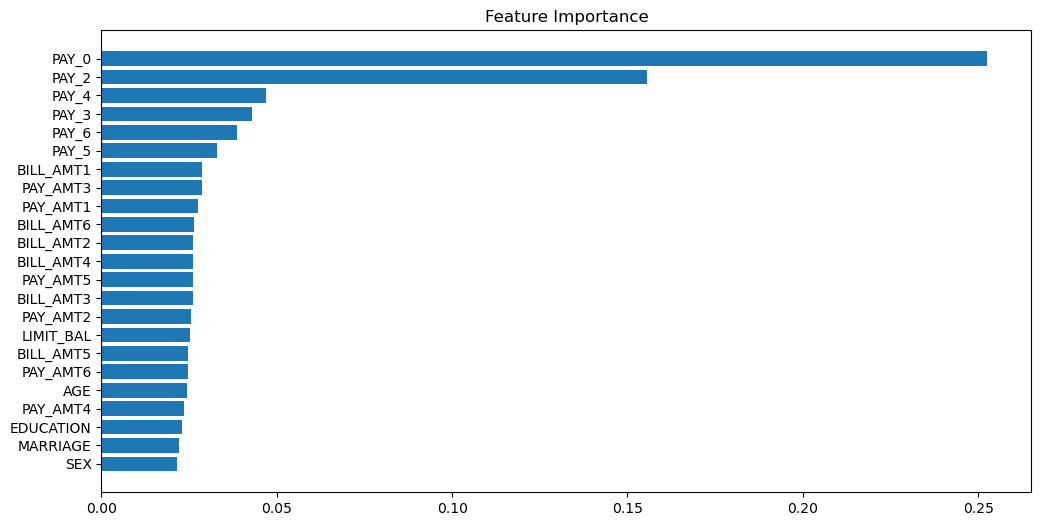

In [18]:
# plots feature importances
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_plot.columns)[sorted_idx])
plt.title('Feature Importance')

#### Conclusion: Demographic information is basically useless, and the likelihood of default depends more on recent payment status than on anything else, which anyone could have guessed and which is useless from the bank's point of view because that can only be assessed after the loan is granted and not before.

## Second attempt: XGBClassifier with test data balanced with SMOTE

In [19]:
# sets the train/test split
sm = SMOTE(random_state = 2)
X_res, Y_res = sm.fit_resample(X, y)
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_res, Y_res, test_size = 0.30, random_state = 1)

In [20]:
xgb_estimator_tuned_smote = XGBClassifier(booster = "gbtree", 
                                          random_state = 3, 
                                          n_jobs=-1)

In [21]:
# Grid of parameters to choose from
parameters = {'max_depth':range(3,10,2),
            'min_child_weight':range(1,6,2),
            'learning_rate': [1],
            'max_bin':[256],
            'n_estimators':[100, 200]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(xgb_estimator_tuned_smote, parameters, scoring = scorer, cv = 20)

# fit the GridSearch on train dataset
grid_obj = grid_obj.fit(X_train_res, y_train_res)

# Set the clf to the best combination of parameters
xgb_estimator_tuned_smote = grid_obj.best_estimator_

In [22]:
xgb_estimator_tuned_smote.fit(X_train_res, y_train_res)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1, max_bin=256,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=3, ...)

In [23]:
y_pred_test = xgb_estimator_tuned_smote.predict(X_test_res)

In [24]:
confusion_matrix(y_test_res, y_pred_test)

array([[5469, 1026],
       [1142, 5415]], dtype=int64)

In [25]:
# calculates recall and precision
TN = confusion_matrix(y_test, y_pred)[0,0]
FP = confusion_matrix(y_test, y_pred)[0,1]
FN = confusion_matrix(y_test, y_pred)[1,0]
TP = confusion_matrix(y_test, y_pred)[1,1]

print("The training recall is", np.round(TP/(FN + TP),4))
print("The training precision is", np.round(TP/(FP + TP),4))

print("The training true positive rate is", np.round(TP/(TP+FN),4))
print("The training false negative rate is", np.round(FN/(TP+FN),4))
print("The training true negative rate is", np.round(TN/(TN+FP),4))
print("The training false positive rate is", np.round(FP/(FP+TN),4))

The training recall is 0.3884
The training precision is 0.5115
The training true positive rate is 0.3884
The training false negative rate is 0.6116
The training true negative rate is 0.8922
The training false positive rate is 0.1078


Text(0.5, 1.0, 'Feature Importance')

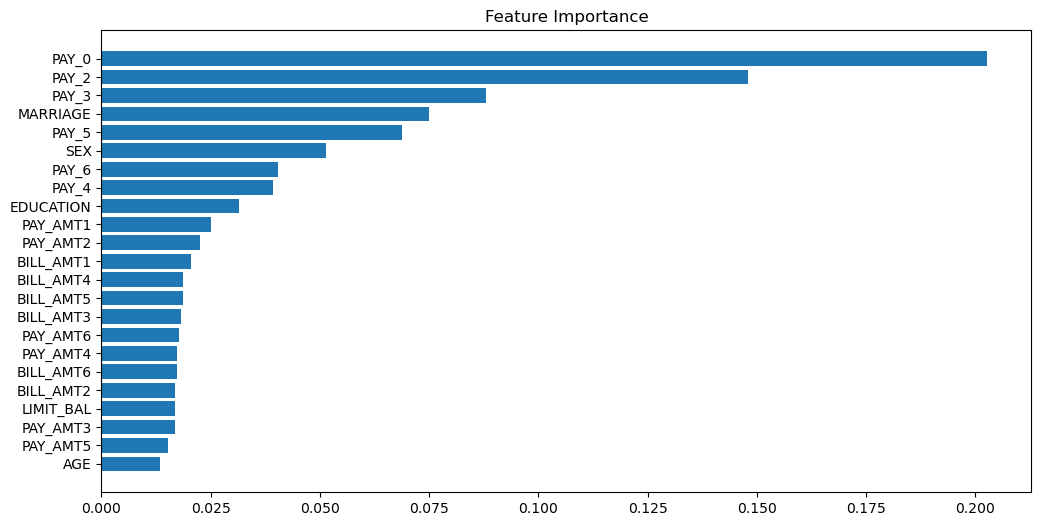

In [26]:
# plots the feature importances
feature_importance = xgb_estimator_tuned_smote.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_plot.columns)[sorted_idx])
plt.title('Feature Importance')

#### Conclusion: The results are not much different than those without SMOTE, but demographic into like marriage and sex makes more of a difference here, which is useful because it can be assessed before the loan is given.

## Third attempt: XGBClassifier with test data balanced with SMOTE and user-defined new columns

In [27]:
# sums billing amounts
df['BILL_AMT_SUM'] = df[["BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5",
                        "BILL_AMT6"]].sum(axis=1)
# sums payment amounts
df['PAY_AMT_SUM'] = df[["PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", 
                        "PAY_AMT6"]].sum(axis=1)

In [28]:
# creates a new set of input data, including the new summed columns and excluding the 
# summand columns
X_sum_plot = df[["LIMIT_BAL", "SEX", "EDUCATION", "MARRIAGE", "AGE", "PAY_0", "PAY_2", "PAY_3", "PAY_4", 
       "PAY_5", "PAY_6", "BILL_AMT_SUM", "PAY_AMT_SUM"
       ]]
X_sum = X_sum_plot.to_numpy()

In [29]:
sm_sum = SMOTE(random_state = 3)
X_res_sum, Y_res_sum = sm_sum.fit_resample(X_sum, y)
X_train_res_sum, X_test_res_sum, y_train_res_sum, y_test_res_sum = train_test_split(
                                                                            X_res_sum, 
                                                                            Y_res_sum, 
                                                                            test_size = 0.30, 
                                                                            random_state = 3)

In [30]:
xgb_estimator_tuned_smote_sum = XGBClassifier(booster = "gbtree", 
                                          random_state = 3, 
                                          n_jobs=-1)

In [31]:
# Grid of parameters to choose from
parameters = {'max_depth':range(3,10,2),
            'min_child_weight':range(1,6,2),
            'learning_rate': [1],
            'max_bin':[256],
            'n_estimators':[100, 200]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj_sum = GridSearchCV(xgb_estimator_tuned_smote_sum, parameters, scoring = scorer, cv = 20)

#fit the GridSearch on train dataset
grid_obj_sum = grid_obj_sum.fit(X_train_res_sum, y_train_res_sum)

# Set the clf to the best combination of parameters
xgb_estimator_tuned_smote_sum = grid_obj.best_estimator_

In [32]:
xgb_estimator_tuned_smote_sum.fit(X_train_res_sum, y_train_res_sum)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1, max_bin=256,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=3, ...)

In [33]:
y_pred_test_sum = xgb_estimator_tuned_smote_sum.predict(X_test_res_sum)

In [34]:
confusion_matrix(y_test_res_sum, y_pred_test_sum)

array([[5295, 1229],
       [1194, 5334]], dtype=int64)

In [35]:
# calculates recall and precision
TN = confusion_matrix(y_test, y_pred)[0,0]
FP = confusion_matrix(y_test, y_pred)[0,1]
FN = confusion_matrix(y_test, y_pred)[1,0]
TP = confusion_matrix(y_test, y_pred)[1,1]

print("The training recall is", np.round(TP/(FN + TP),4))
print("The training precision is", np.round(TP/(FP + TP),4))

print("The training true positive rate is", np.round(TP/(TP+FN),4))
print("The training false negative rate is", np.round(FN/(TP+FN),4))
print("The training true negative rate is", np.round(TN/(TN+FP),4))
print("The training false positive rate is", np.round(FP/(FP+TN),4))

The training recall is 0.3884
The training precision is 0.5115
The training true positive rate is 0.3884
The training false negative rate is 0.6116
The training true negative rate is 0.8922
The training false positive rate is 0.1078


Text(0.5, 1.0, 'Feature Importance')

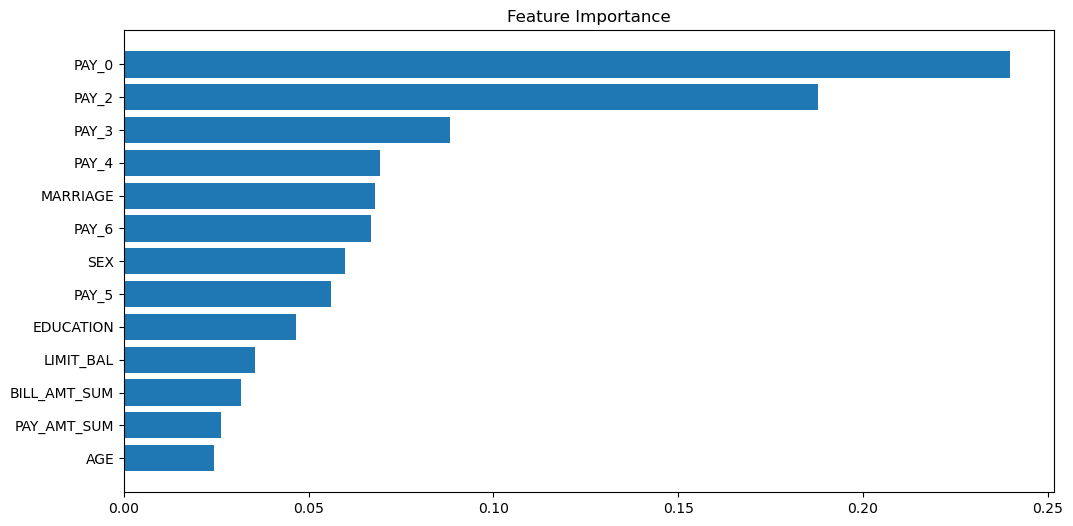

In [37]:
# plots feature importances
feature_importance = xgb_estimator_tuned_smote_sum.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_sum_plot.columns)[sorted_idx])
plt.title('Feature Importance')

#### Conclusion: Summing billed and paid amounts does nothing to improve recall or precision, and marital status and sex continue to be important and age and education level continue not to be.